In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from scipy.stats import kstest
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [5]:
# have a look at the data
pd.read_csv('Data/Input_Data/dataframe_with_outliers_3std_4.16%.csv', sep=",")

,Unnamed: 0,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,outlier
0,7,A,1.0,1.0,3.0,2.0,1.0,8.0,2.0,2.0,2.0,8.0,2.0,8.0,1.0,6.0,2.0,7.0,0
1,78,A,3.0,7.0,5.0,5.0,3.0,12.0,2.0,3.0,2.0,10.0,2.0,9.0,2.0,6.0,3.0,8.0,0
2,118,A,3.0,8.0,5.0,6.0,3.0,9.0,2.0,2.0,3.0,8.0,2.0,8.0,2.0,6.0,3.0,7.0,0
3,130,A,2.0,1.0,4.0,2.0,1.0,8.0,1.0,2.0,2.0,7.0,2.0,8.0,2.0,5.0,2.0,7.0,0
4,134,A,3.0,7.0,5.0,5.0,3.0,10.0,4.0,1.0,2.0,8.0,3.0,9.0,2.0,4.0,2.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19707,Z,4.0,6.0,6.0,4.0,4.0,9.0,11.0,6.0,5.0,6.0,5.0,9.0,3.0,8.0,9.0,6.0,0
19996,19798,Z,2.0,1.0,2.0,1.0,1.0,8.0,7.0,5.0,9.0,6.0,6.0,8.0,1.0,8.0,6.0,8.0,0
19997,19808,Z,3.0,9.0,4.0,7.0,2.0,7.0,7.0,4.0,14.0,10.0,6.0,8.0,0.0,8.0,8.0,8.0,0
19998,19884,Z,5.0,10.0,6.0,8.0,3.0,7.0,7.0,4.0,15.0,9.0,6.0,8.0,0.0,8.0,8.0,8.0,0


In [6]:
# read full dataframe and rename the columns
df =  pd.read_csv('Data/Input_Data/dataframe_with_outliers_3std_4.16%.csv', sep=",", 
usecols=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])
df.columns = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,A,1.0,1.0,3.0,2.0,1.0,8.0,2.0,2.0,2.0,8.0,2.0,8.0,1.0,6.0,2.0,7.0
1,A,3.0,7.0,5.0,5.0,3.0,12.0,2.0,3.0,2.0,10.0,2.0,9.0,2.0,6.0,3.0,8.0
2,A,3.0,8.0,5.0,6.0,3.0,9.0,2.0,2.0,3.0,8.0,2.0,8.0,2.0,6.0,3.0,7.0
3,A,2.0,1.0,4.0,2.0,1.0,8.0,1.0,2.0,2.0,7.0,2.0,8.0,2.0,5.0,2.0,7.0
4,A,3.0,7.0,5.0,5.0,3.0,10.0,4.0,1.0,2.0,8.0,3.0,9.0,2.0,4.0,2.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Z,4.0,6.0,6.0,4.0,4.0,9.0,11.0,6.0,5.0,6.0,5.0,9.0,3.0,8.0,9.0,6.0
19996,Z,2.0,1.0,2.0,1.0,1.0,8.0,7.0,5.0,9.0,6.0,6.0,8.0,1.0,8.0,6.0,8.0
19997,Z,3.0,9.0,4.0,7.0,2.0,7.0,7.0,4.0,14.0,10.0,6.0,8.0,0.0,8.0,8.0,8.0
19998,Z,5.0,10.0,6.0,8.0,3.0,7.0,7.0,4.0,15.0,9.0,6.0,8.0,0.0,8.0,8.0,8.0


In [7]:
# delete letter column
letters = df[0]
df = df.drop(0, axis=1)
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,1.0,3.0,2.0,1.0,8.0,2.0,2.0,2.0,8.0,2.0,8.0,1.0,6.0,2.0,7.0
1,3.0,7.0,5.0,5.0,3.0,12.0,2.0,3.0,2.0,10.0,2.0,9.0,2.0,6.0,3.0,8.0
2,3.0,8.0,5.0,6.0,3.0,9.0,2.0,2.0,3.0,8.0,2.0,8.0,2.0,6.0,3.0,7.0
3,2.0,1.0,4.0,2.0,1.0,8.0,1.0,2.0,2.0,7.0,2.0,8.0,2.0,5.0,2.0,7.0
4,3.0,7.0,5.0,5.0,3.0,10.0,4.0,1.0,2.0,8.0,3.0,9.0,2.0,4.0,2.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4.0,6.0,6.0,4.0,4.0,9.0,11.0,6.0,5.0,6.0,5.0,9.0,3.0,8.0,9.0,6.0
19996,2.0,1.0,2.0,1.0,1.0,8.0,7.0,5.0,9.0,6.0,6.0,8.0,1.0,8.0,6.0,8.0
19997,3.0,9.0,4.0,7.0,2.0,7.0,7.0,4.0,14.0,10.0,6.0,8.0,0.0,8.0,8.0,8.0
19998,5.0,10.0,6.0,8.0,3.0,7.0,7.0,4.0,15.0,9.0,6.0,8.0,0.0,8.0,8.0,8.0


2
<class 'int'>
KstestResult(statistic=0.9033498680518208, pvalue=0.0, statistic_location=2.0, statistic_sign=-1)


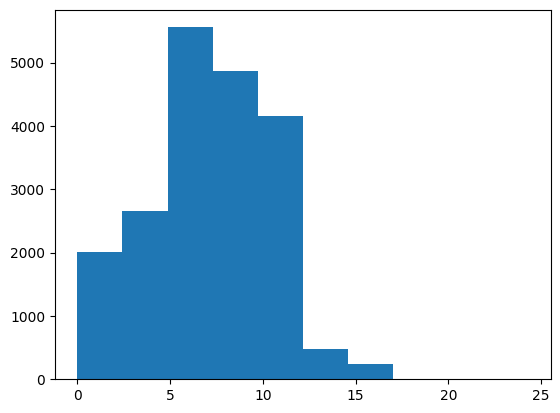

3
<class 'int'>
KstestResult(statistic=0.9483998680518207, pvalue=0.0, statistic_location=2.0, statistic_sign=-1)


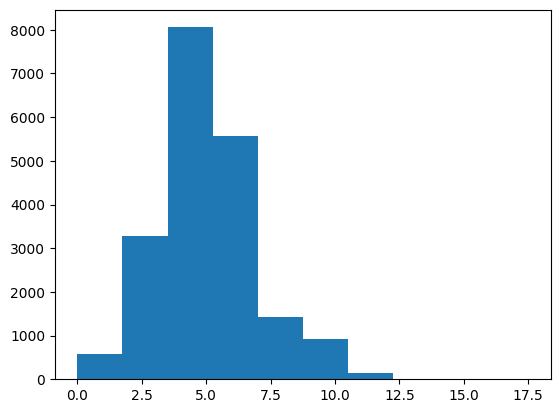

4
<class 'int'>
KstestResult(statistic=0.9149998680518208, pvalue=0.0, statistic_location=2.0, statistic_sign=-1)


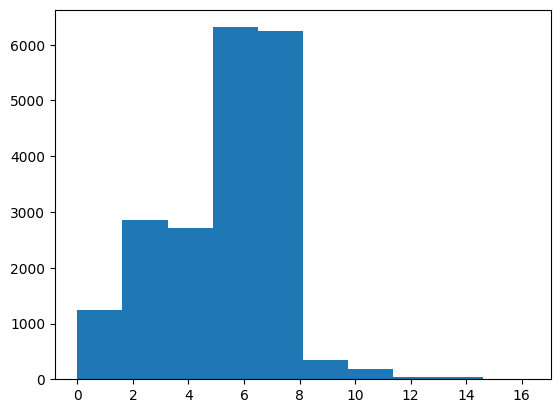

5
<class 'int'>
KstestResult(statistic=0.8142998680518208, pvalue=0.0, statistic_location=2.0, statistic_sign=-1)


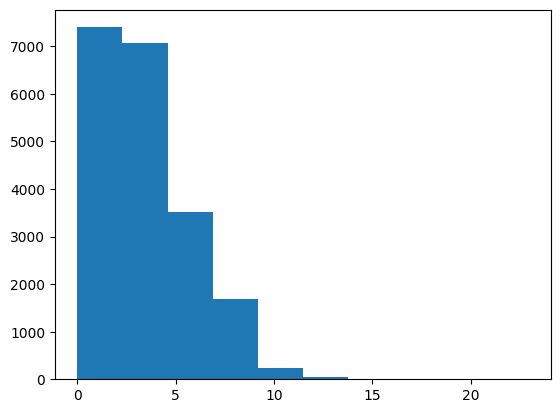

6
<class 'int'>
KstestResult(statistic=0.9741001019683699, pvalue=0.0, statistic_location=3.0, statistic_sign=-1)


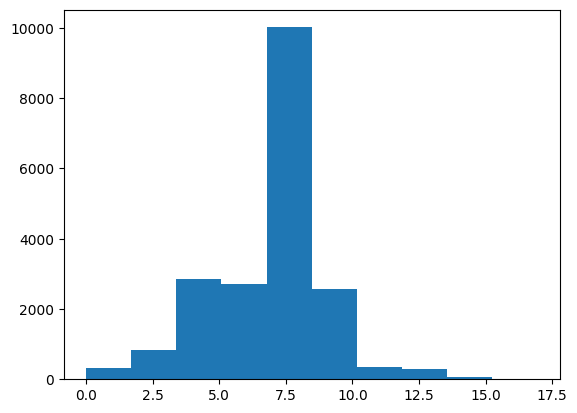

7
<class 'int'>
KstestResult(statistic=0.9700001019683699, pvalue=0.0, statistic_location=3.0, statistic_sign=-1)


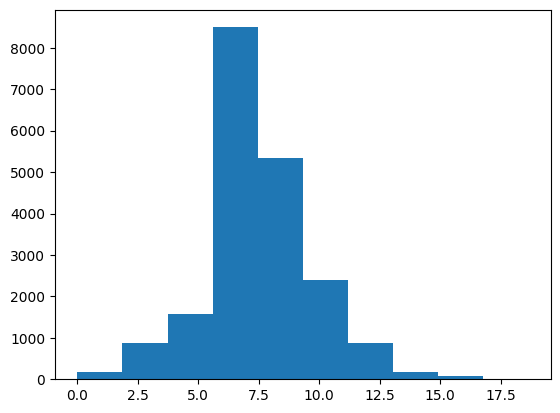

8
<class 'int'>
KstestResult(statistic=0.9020998680518209, pvalue=0.0, statistic_location=2.0, statistic_sign=-1)


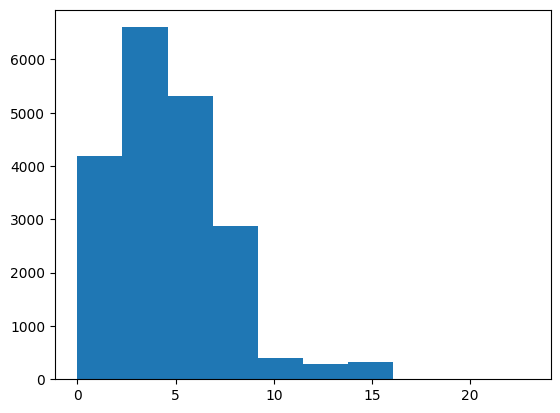

9
<class 'int'>
KstestResult(statistic=0.9228998680518208, pvalue=0.0, statistic_location=2.0, statistic_sign=-1)


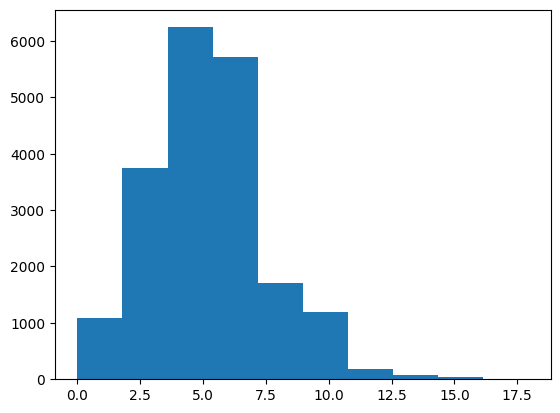

10
<class 'int'>
KstestResult(statistic=0.9835001019683699, pvalue=0.0, statistic_location=3.0, statistic_sign=-1)


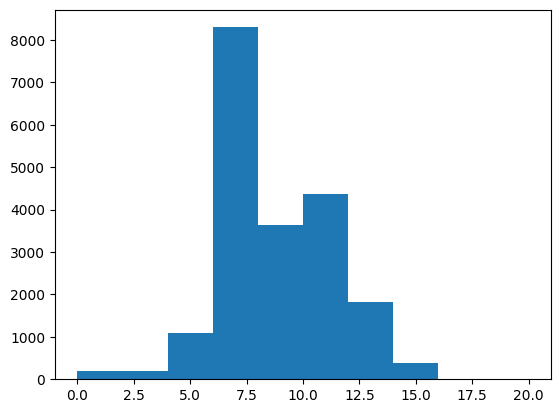

11
<class 'int'>
KstestResult(statistic=0.9464498680518207, pvalue=0.0, statistic_location=2.0, statistic_sign=-1)


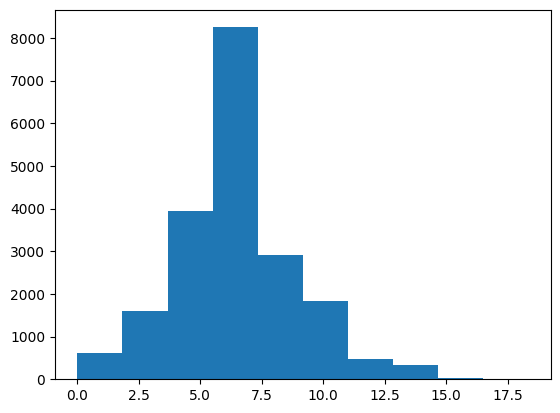

12
<class 'int'>
KstestResult(statistic=0.9948001019683699, pvalue=0.0, statistic_location=3.0, statistic_sign=-1)


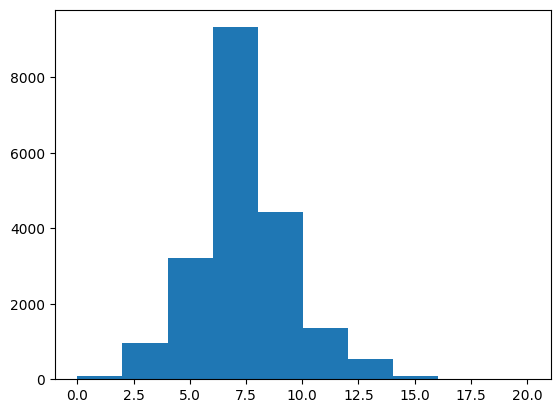

13
<class 'int'>
KstestResult(statistic=0.7263998680518208, pvalue=0.0, statistic_location=2.0, statistic_sign=-1)


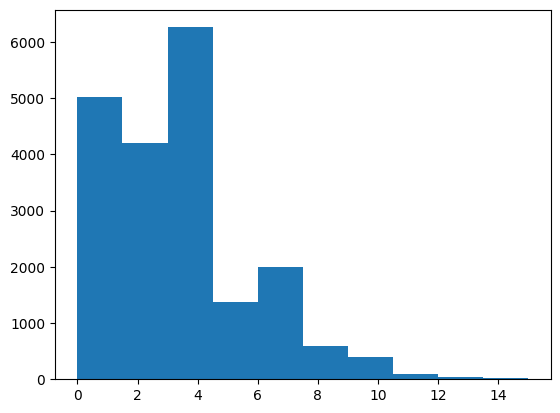

14
<class 'int'>
KstestResult(statistic=0.9971001019683698, pvalue=0.0, statistic_location=3.0, statistic_sign=-1)


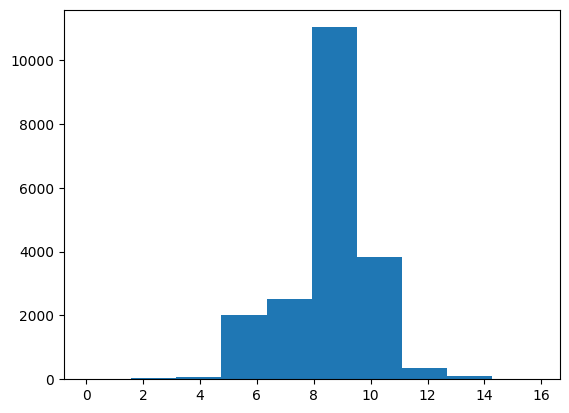

15
<class 'int'>
KstestResult(statistic=0.7520498680518208, pvalue=0.0, statistic_location=2.0, statistic_sign=-1)


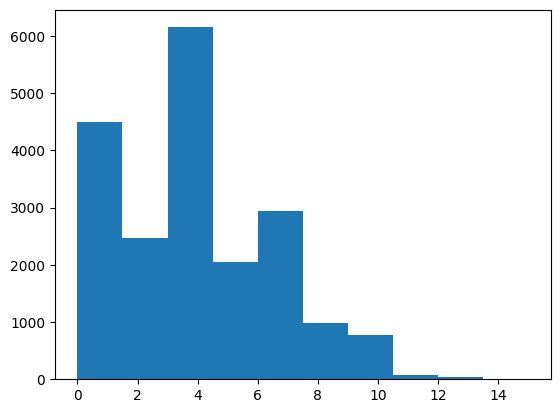

16
<class 'int'>
KstestResult(statistic=0.9962001019683699, pvalue=0.0, statistic_location=3.0, statistic_sign=-1)


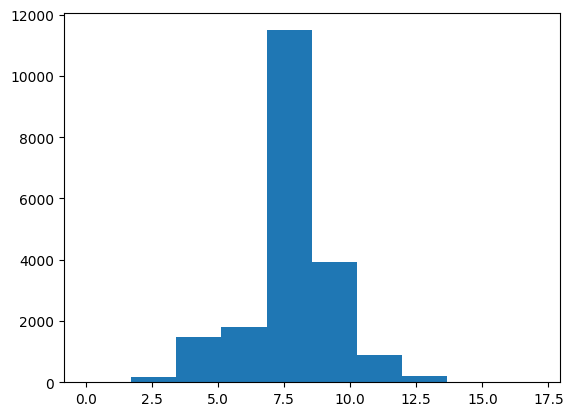

In [8]:
#Test for gaussian distribution with the kolmogorov-smirnov test, as well as visually through histograms
for i in range(2,17):
    print(i)
    print(type(i))
    print(kstest(df[i], 'norm'))
    plt.hist(df[i])
    plt.show()
    
# Results show that the distribution of the data is not normal (p-value, histograms), thus, we cannot use PCA or other methods that assume normal distribution

In [9]:
#KNN (K-Nearest Neighbors) to determine the eps-value for the DBSCAN

neighbors = NearestNeighbors(n_neighbors=32)
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)

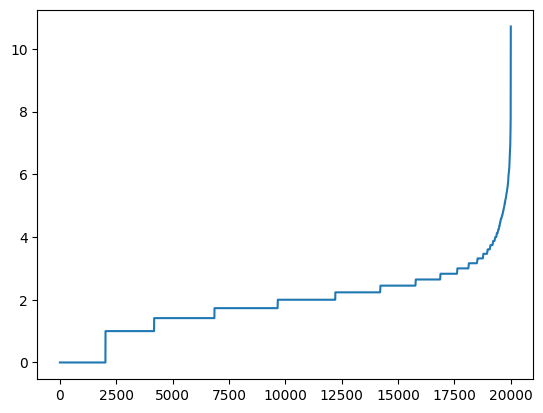

In [10]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [11]:
#DBSCAN
#min_samples = 2*Dimensions(=16) = 32
#eps = 3.9 (knee, after some testing, 3.9 produces the best results)
db = DBSCAN(eps=3.9, min_samples=32).fit(df)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Make copy of DF and then add new columns to it so we can rerun this code as much as we like
df1 = df.copy()
df1['cluster'] = labels
df1[0] = letters
print(n_clusters_, n_noise_)
df1

percent_outliers = n_noise_ / len(df1.index) * 100
print("Outliers: ", percent_outliers, "%")
#Cluster -1 contains the outliers.
#14 clusters, 3852 ouliers (19.26%)

18 4487
Outliers:  22.435 %


In [12]:
#Show clusters and letter combinations.
df2 = df1
pd.set_option('display.max_rows', 200)
df2.groupby(['cluster', 0]).size()

#Displays each cluster and how many units of each letter are included in the cluster. 
#As can be seen, cluster 0 is very big, while other clusters are very small. 

cluster  0
-1       A    181
         B    106
         C    137
         D    152
         E    118
         F    150
         G    165
         H    133
         I    141
         J    181
         K    196
         L    164
         M    325
         N    212
         O    125
         P    258
         Q    217
         R    106
         S    188
         T    128
         U    176
         V    143
         W    234
         X    116
         Y    251
         Z    184
 0       A    577
         L      2
         Q      1
         S      3
 1       A     31
         B    660
         C    599
         D    653
         E    649
         F    588
         G    608
         H    416
         I    614
         J    401
         K    421
         L     89
         M    276
         N    367
         O    628
         P    398
         Q    535
         R    652
         S    557
         T    607
         U    441
         V    621
         W    478
         X    671
         Y    535

In [13]:
df1

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,cluster,0
0,1.0,1.0,3.0,2.0,1.0,8.0,2.0,2.0,2.0,8.0,2.0,8.0,1.0,6.0,2.0,7.0,0,A
1,3.0,7.0,5.0,5.0,3.0,12.0,2.0,3.0,2.0,10.0,2.0,9.0,2.0,6.0,3.0,8.0,0,A
2,3.0,8.0,5.0,6.0,3.0,9.0,2.0,2.0,3.0,8.0,2.0,8.0,2.0,6.0,3.0,7.0,0,A
3,2.0,1.0,4.0,2.0,1.0,8.0,1.0,2.0,2.0,7.0,2.0,8.0,2.0,5.0,2.0,7.0,0,A
4,3.0,7.0,5.0,5.0,3.0,10.0,4.0,1.0,2.0,8.0,3.0,9.0,2.0,4.0,2.0,7.0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4.0,6.0,6.0,4.0,4.0,9.0,11.0,6.0,5.0,6.0,5.0,9.0,3.0,8.0,9.0,6.0,1,Z
19996,2.0,1.0,2.0,1.0,1.0,8.0,7.0,5.0,9.0,6.0,6.0,8.0,1.0,8.0,6.0,8.0,1,Z
19997,3.0,9.0,4.0,7.0,2.0,7.0,7.0,4.0,14.0,10.0,6.0,8.0,0.0,8.0,8.0,8.0,1,Z
19998,5.0,10.0,6.0,8.0,3.0,7.0,7.0,4.0,15.0,9.0,6.0,8.0,0.0,8.0,8.0,8.0,1,Z


A


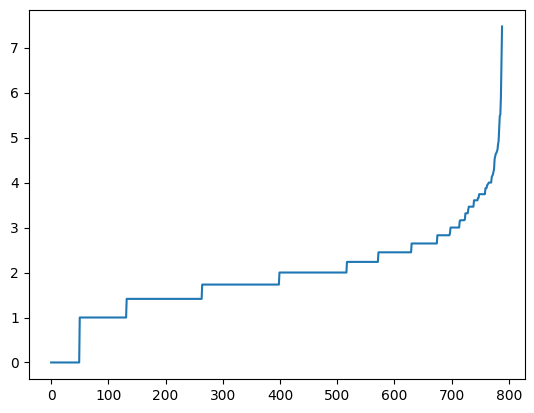

knee:  770 4.000000000000028
Letter: A Number of clusters:  4 Number of outliers: 119 Percentage of outliers: 15.08 %
B


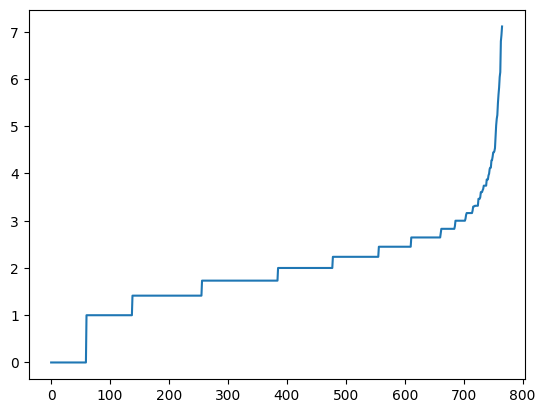

knee:  742 3.872983346207417
Letter: B Number of clusters:  2 Number of outliers: 129 Percentage of outliers: 16.84 %
C


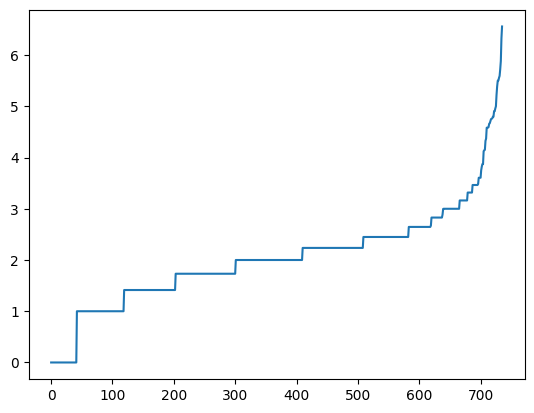

knee:  713 4.58257569495584
Letter: C Number of clusters:  3 Number of outliers: 32 Percentage of outliers: 4.35 %
D


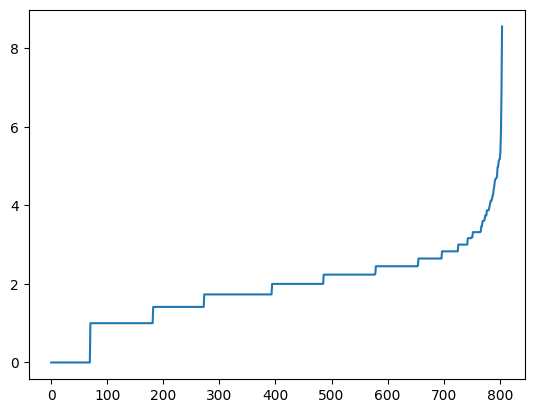

knee:  781 3.872983346207417
Letter: D Number of clusters:  4 Number of outliers: 141 Percentage of outliers: 17.52 %
E


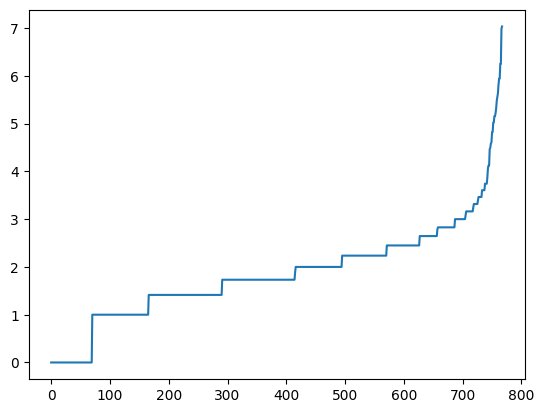

knee:  756 5.156413093505359
Letter: E Number of clusters:  1 Number of outliers: 14 Percentage of outliers: 1.82 %
F


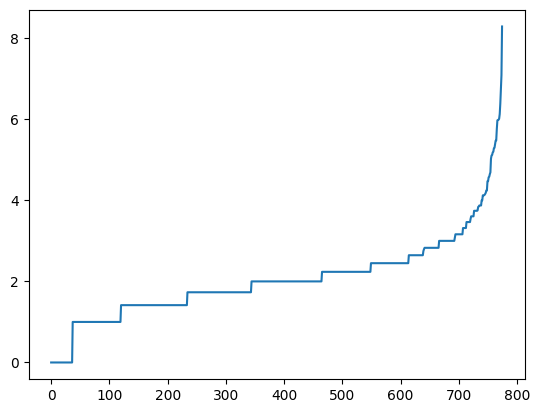

knee:  744 4.123105625617661
Letter: F Number of clusters:  4 Number of outliers: 123 Percentage of outliers: 15.87 %
G


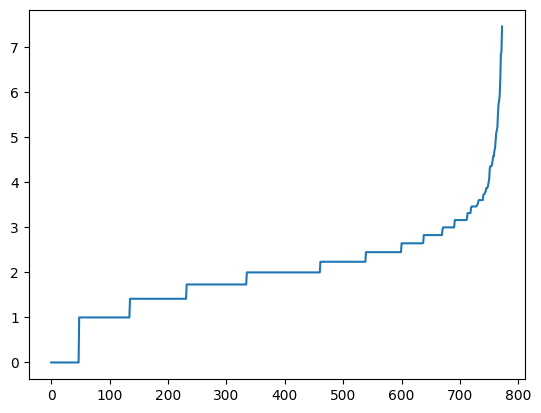

knee:  755 4.358898943540674
Letter: G Number of clusters:  4 Number of outliers: 81 Percentage of outliers: 10.48 %
H


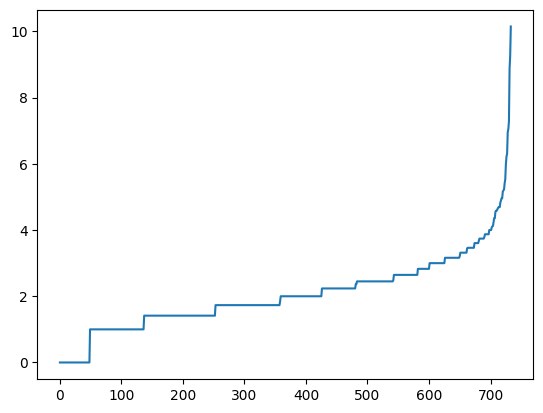

knee:  716 4.69041575982343
Letter: H Number of clusters:  2 Number of outliers: 93 Percentage of outliers: 12.67 %
I


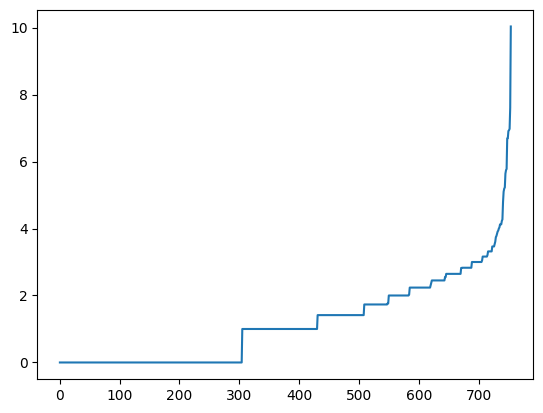

knee:  739 4.123105625617661
Letter: I Number of clusters:  5 Number of outliers: 85 Percentage of outliers: 11.26 %
J


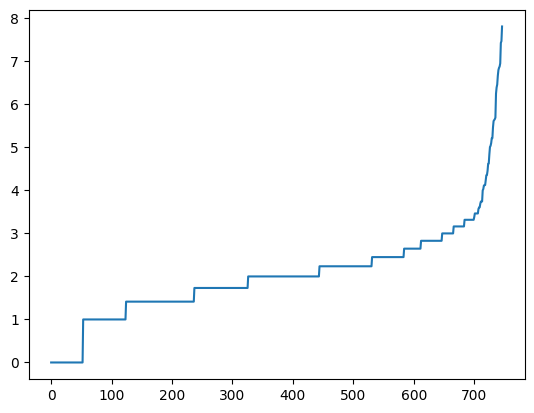

knee:  719 4.123105625617661
Letter: J Number of clusters:  5 Number of outliers: 155 Percentage of outliers: 20.75 %
K


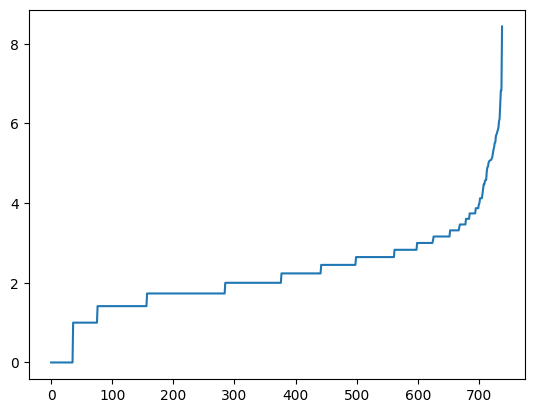

knee:  706 4.123105625617661
Letter: K Number of clusters:  4 Number of outliers: 194 Percentage of outliers: 26.25 %
L


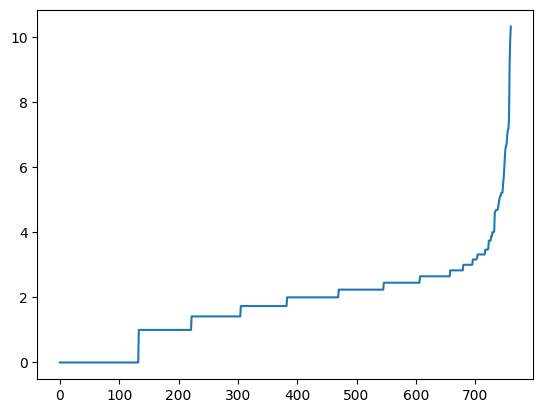

knee:  747 5.218061502920464
Letter: L Number of clusters:  3 Number of outliers: 19 Percentage of outliers: 2.50 %
M


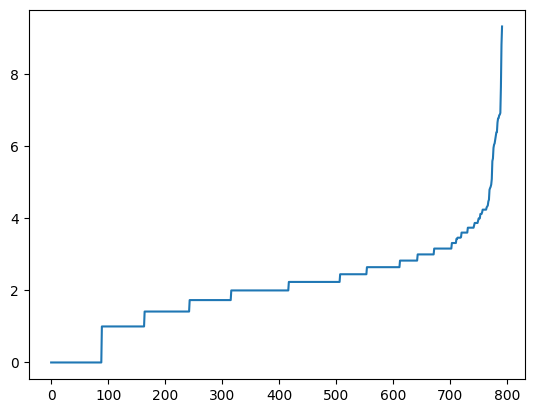

knee:  764 4.242640687119285
Letter: M Number of clusters:  3 Number of outliers: 227 Percentage of outliers: 28.66 %
N


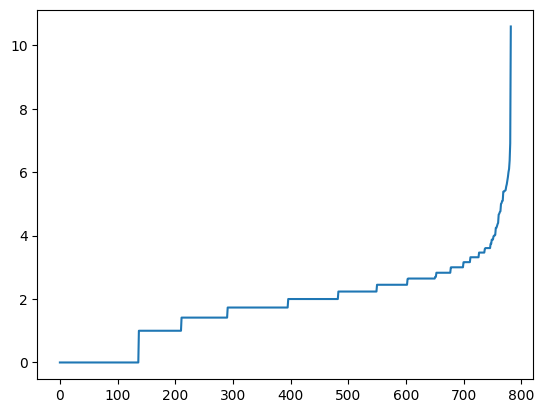

knee:  755 4.0
Letter: N Number of clusters:  3 Number of outliers: 200 Percentage of outliers: 25.54 %
O


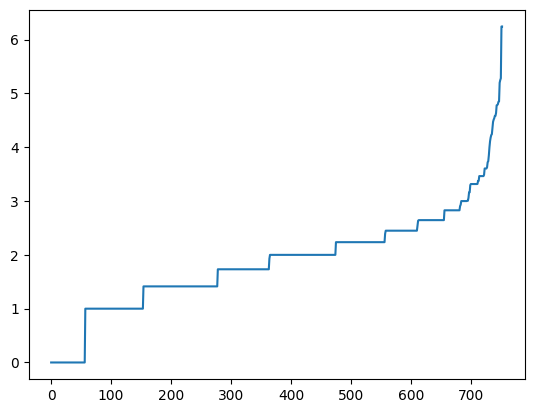

knee:  727 3.605551275463989
Letter: O Number of clusters:  1 Number of outliers: 192 Percentage of outliers: 25.50 %
P


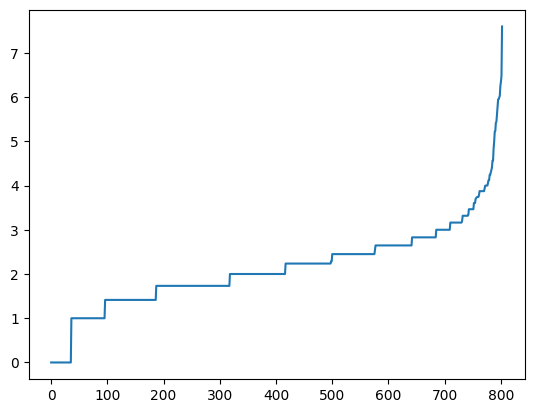

knee:  782 4.242640687119285
Letter: P Number of clusters:  2 Number of outliers: 143 Percentage of outliers: 17.81 %
Q


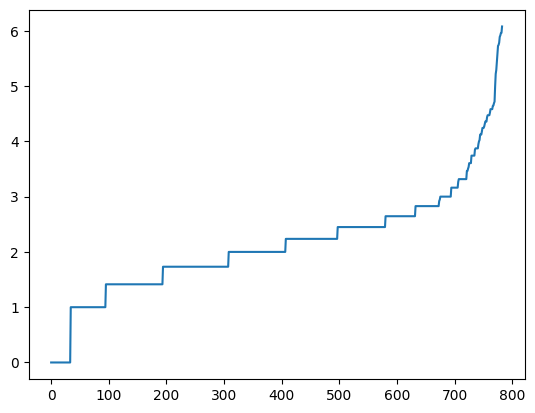

knee:  766 4.58257569495584
Letter: Q Number of clusters:  3 Number of outliers: 62 Percentage of outliers: 7.92 %
R


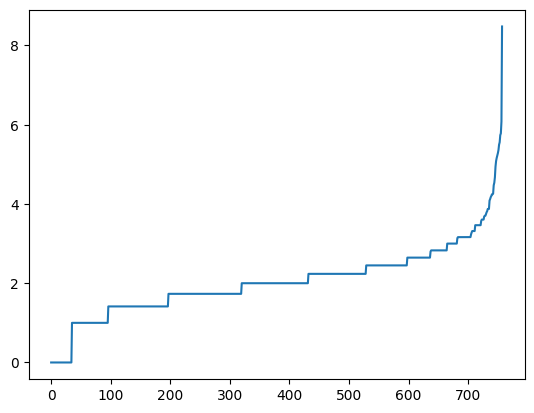

knee:  736 3.8741596107103073
Letter: R Number of clusters:  2 Number of outliers: 126 Percentage of outliers: 16.62 %
S


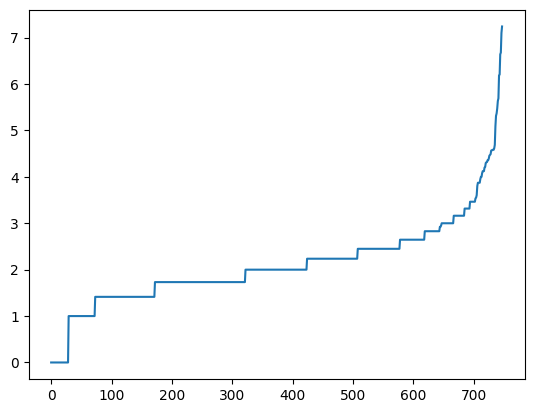

knee:  734 4.58257569495584
Letter: S Number of clusters:  4 Number of outliers: 80 Percentage of outliers: 10.70 %
T


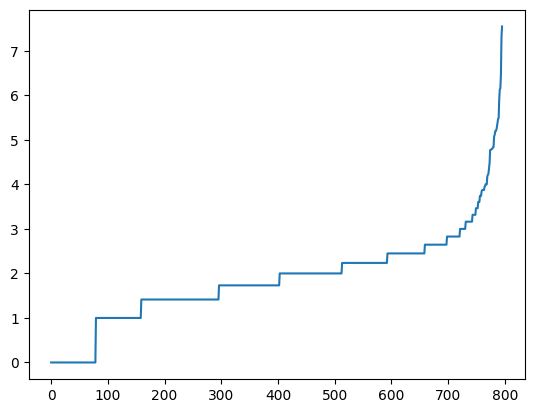

knee:  769 4.0
Letter: T Number of clusters:  4 Number of outliers: 100 Percentage of outliers: 12.56 %
U


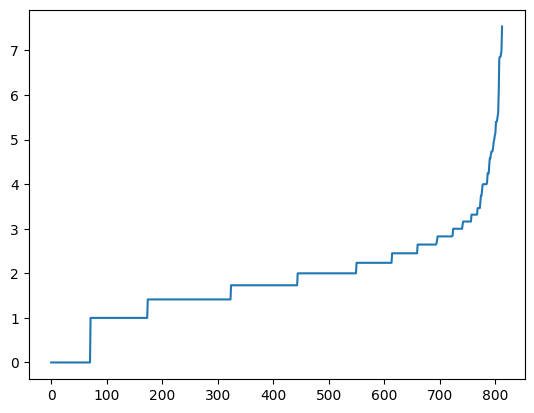

knee:  789 4.243310629009514
Letter: U Number of clusters:  3 Number of outliers: 89 Percentage of outliers: 10.95 %
V


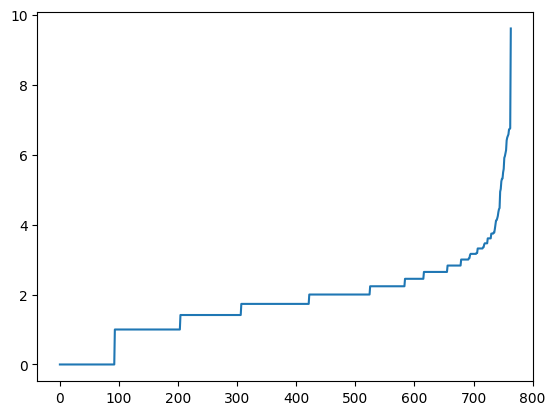

knee:  734 3.7416573867739413
Letter: V Number of clusters:  4 Number of outliers: 146 Percentage of outliers: 19.11 %
W


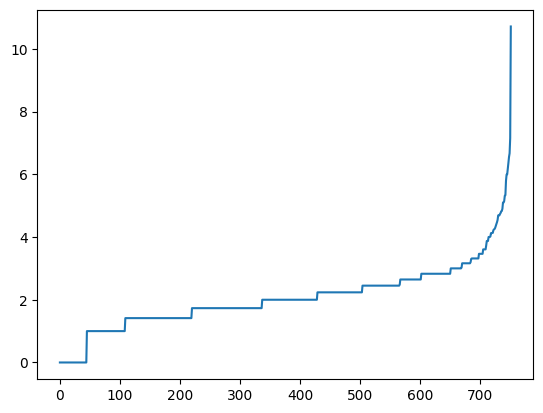

knee:  733 4.69041575982343
Letter: W Number of clusters:  3 Number of outliers: 91 Percentage of outliers: 12.10 %
X


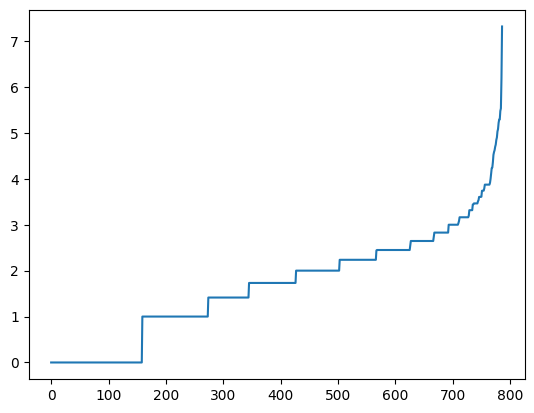

knee:  765 3.872983346207417
Letter: X Number of clusters:  2 Number of outliers: 116 Percentage of outliers: 14.74 %
Y


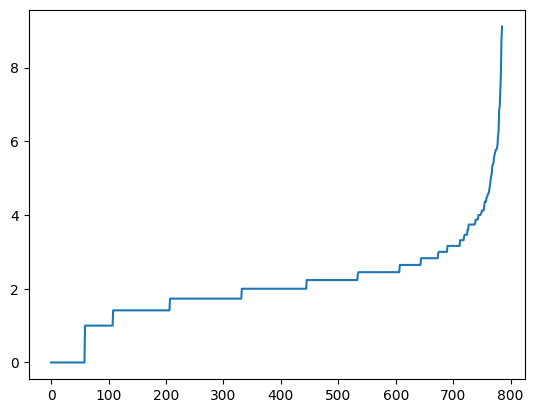

knee:  758 4.358898943540674
Letter: Y Number of clusters:  4 Number of outliers: 149 Percentage of outliers: 18.96 %
Z


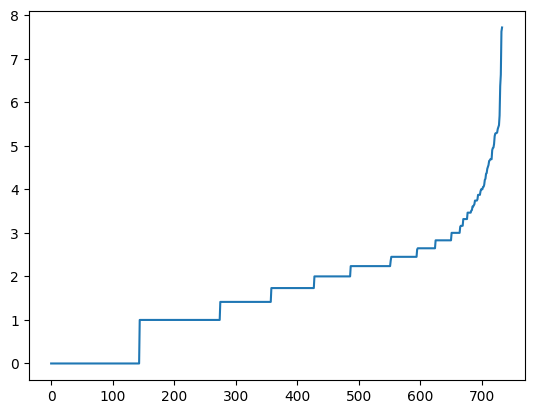

knee:  717 4.69041575982343
Letter: Z Number of clusters:  4 Number of outliers: 47 Percentage of outliers: 6.40 %

Overall outliers:  14.765 %


In [14]:
#KNN (K-Nearest Neighbors) to determine the eps-value for the DBSCAN for each letter
#for ltr in range(65,91): loop through alphabet; 65=A, 66=B, ... 89=Y, 90=Z
num_outliers = 0
ltr_data = pd.DataFrame({
    #'letter': [],
    'clusters': [],
    'outliers': [],
    'percent_outliers': [],
})

outlierColumn =  pd.read_csv('Data/Input_Data/dataframe_with_outliers_3std_4.16%.csv', sep=",", 
        usecols=['letter', "outlier"])
outlierColumn.columns = [1, 18]

outlierColumn

df3 = df1.copy()
df3['letter_outlier'] = np.nan

outputToCSV = pd.DataFrame(data={'_': [0.0]})

for ltr in range(65,91):
    ltr = chr(ltr)
    print(ltr)
    
    dfFiltered = df1[df1[0] == ltr]
    lettersFiltered = dfFiltered[0]
    dfFiltered = dfFiltered.drop(0, axis=1)
    dfFiltered = dfFiltered.drop('cluster', axis=1)

    neighbors = NearestNeighbors(n_neighbors=17)
    neighbors_fit = neighbors.fit(dfFiltered)
    distances, indices = neighbors_fit.kneighbors(dfFiltered)
    
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)
    plt.show()
    
    #calculates the knee (eps)
    from kneed import KneeLocator
    y = distances
    x = range(1, len(distances)+1)
    kn = KneeLocator(x, y, curve='convex', direction='increasing')
    print('knee: ', kn.knee, y[x.index(kn.knee)])
    
    #runs the DBSCAN for each letter with eps = knee and min_samples = 17 (D+1, which is the recommended minimum)
    dbFiltered = DBSCAN(eps=y[x.index(kn.knee)], min_samples=17).fit(dfFiltered)

    core_samples_mask = np.zeros_like(dbFiltered.labels_, dtype=bool)
    core_samples_mask[dbFiltered.core_sample_indices_] = True
    labelsFiltered = dbFiltered.labels_

    #Number of clusters in labels, ignoring noise if present.
    n_clusters_Filtered = len(set(labelsFiltered)) - (1 if -1 in labelsFiltered else 0)
    n_noise_Filtered = list(labelsFiltered).count(-1)
    
    num_outliers += n_noise_Filtered

    #Make copy of DF and then add new columns to the copy so we can rerun this code as much as we like
    df1Filtered = dfFiltered.copy()
    df1Filtered['cluster'] = labelsFiltered
    df1Filtered[0] = lettersFiltered
    
    ltr_percent_outliers = n_noise_Filtered / len(dfFiltered) * 100
    
    print('Letter:', ltr, 'Number of clusters: ', n_clusters_Filtered, 'Number of outliers:', n_noise_Filtered, 
            'Percentage of outliers:', '{:.2f}'.format(ltr_percent_outliers), '%')
    ltr_data.loc[ltr]=[n_clusters_Filtered, n_noise_Filtered, ltr_percent_outliers]
    
    # new code for F1_Score
    outliersFiltered = outlierColumn[outlierColumn[1] == ltr]
    outliersFiltered = outliersFiltered.drop(1, axis=1)
    
    outliersArray = [0 if n != -1 else 1 for n in labelsFiltered]
    j = 0
    for i in dfFiltered.index:
        df3.loc[i,'letter_outlier'] = outliersArray[j]
        j += 1
        pass
    
    """
    row["f1"] = f1_score(
                    results[name]["outlier"], results[name]["projection"])
                row["accuracy"] = accuracy_score(
                    results[name]["outlier"], results[name]["projection"])
                row["precision"] = precision_score(
                    results[name]["outlier"], results[name]["projection"])
                row["recall"] = recall_score(
                    results[name]["outlier"], results[name]["projection"])
    """
    
   

    outputToCSV[ltr] = ltr_percent_outliers / 100

percent_outliers = num_outliers / len(df1.index) * 100
ltr_data.loc["sum", "percent_outliers"] = percent_outliers
print("")
print("Overall outliers: ", percent_outliers, "%")

outputToCSV['sum'] = percent_outliers / 100

#Returns with the knee value and graph, as well as the number of clusters and the number of outliers for each letter
#Final percentage of outliers for all letters together is 14.59%
df3[18] = outlierColumn[18]

In [15]:
# evaluate the results
print(f1_score(df3[18], df3['letter_outlier']))
print(accuracy_score(df3[18], df3['letter_outlier']))
print(precision_score(df3[18], df3['letter_outlier']))
print(recall_score(df3[18], df3['letter_outlier']))

# save the evaluation
outputToCSV['f1'] = f1_score(df3[18], df3['letter_outlier'])
outputToCSV['accuracy'] = accuracy_score(df3[18], df3['letter_outlier'])
outputToCSV['precision'] = precision_score(df3[18], df3['letter_outlier'])
outputToCSV['recall'] = recall_score(df3[18], df3['letter_outlier'])

0.30066050198150596
0.86765
0.19268540467321368
0.6838942307692307


In [16]:
# save the percentages and the evaluation
outputToCSV.to_csv('Data/Output_Data/03_DBScan/result_DBSCAN_per_3std_4,16%.csv')

In [17]:
# save the results
df4 = df3.copy()
df4 = df4.drop('cluster', axis=1)
df4 = df4.drop(0, axis=1)
df4 = df4.rename(columns={18: 'projection', 'letter_outlier': 'outlier'})
df4.to_csv('Data/Output_Data/03_DBScan/result_DBSCAN_val_3std_4,16%.csv')

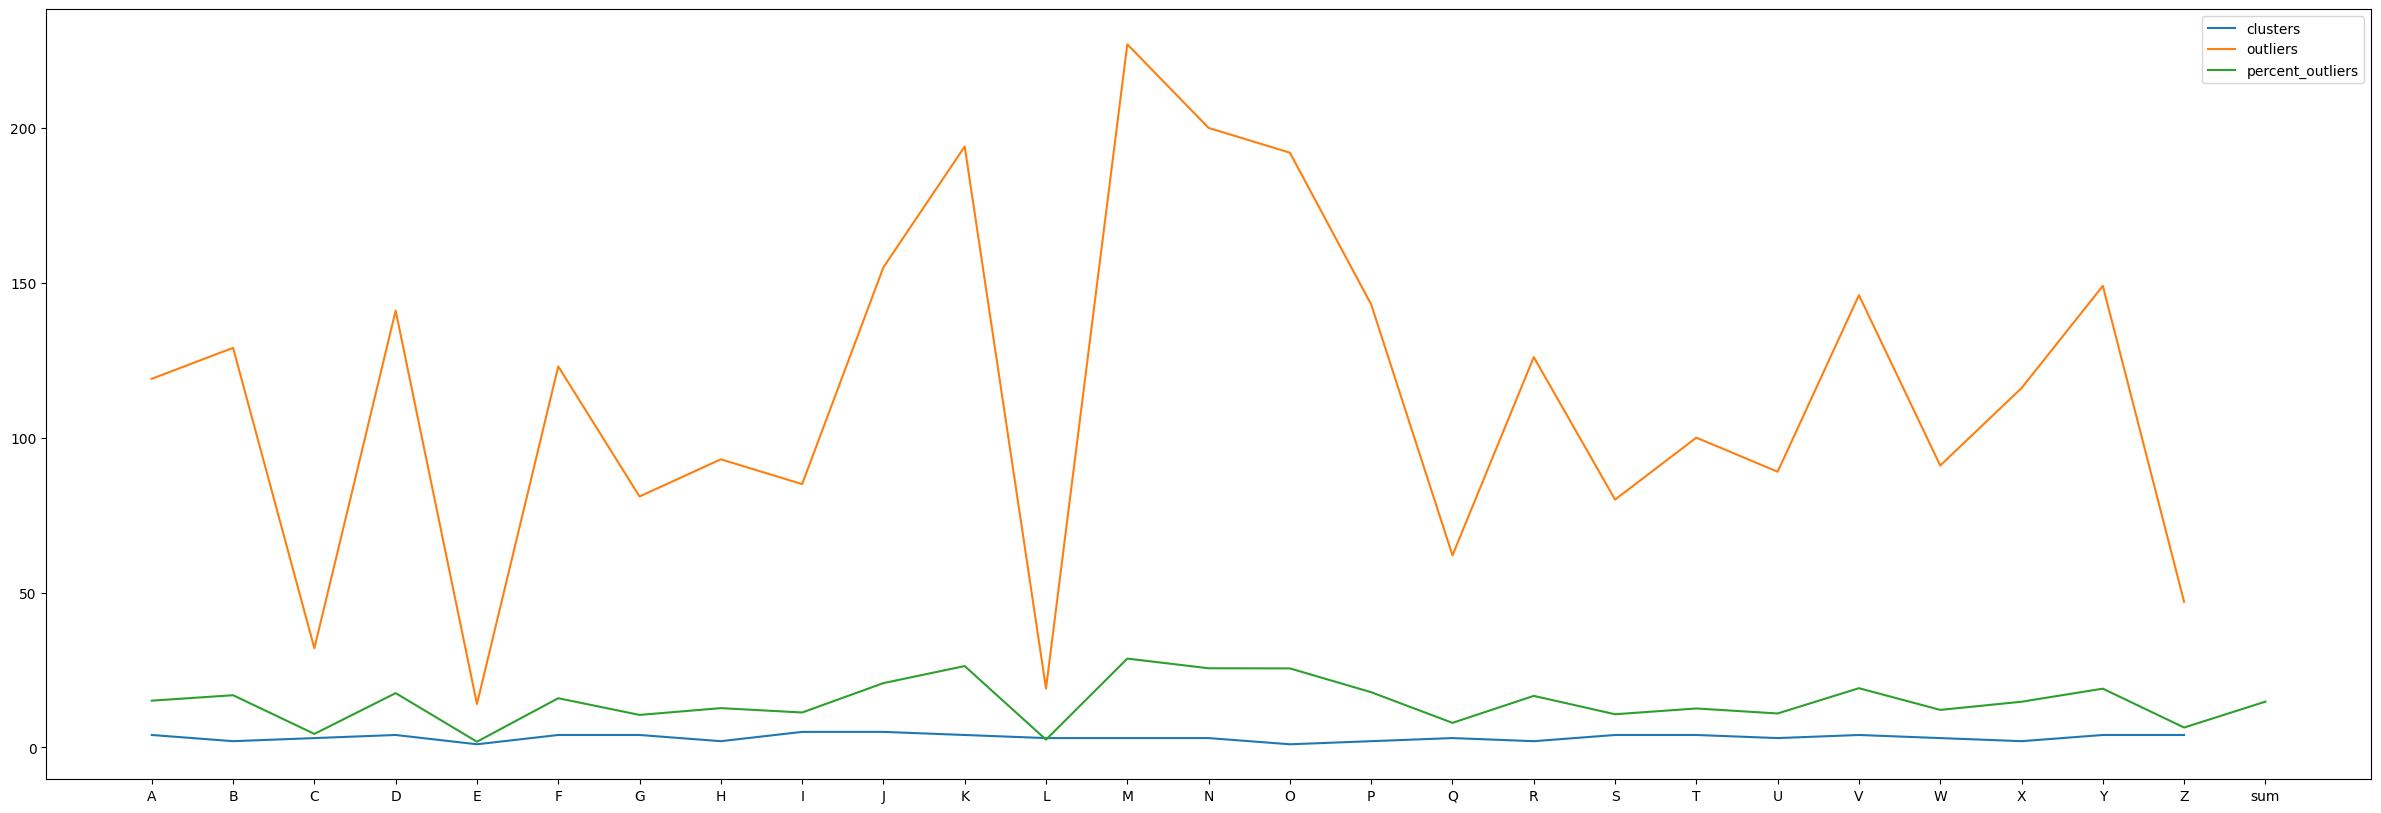

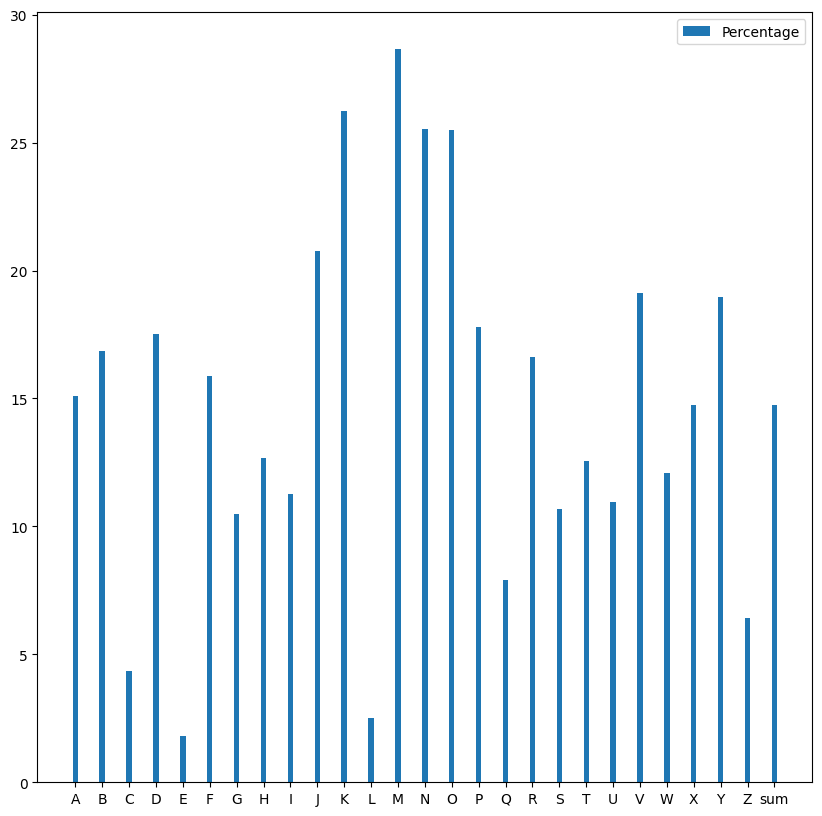

In [18]:
# plot the results
ltr_data.plot(figsize=(30,10))
plt.xticks(range(0,27), labels=ltr_data.index)
plt.show()

fig = plt.figure(figsize=(10,10))
plt.bar(np.arange(len(ltr_data)), height=ltr_data['percent_outliers'], width=0.2, label='Percentage')
plt.xticks(range(0,27), labels=ltr_data.index)
plt.legend()
plt.show(fig)


In [19]:
# clusters and percentages 
ltr_data.to_csv("Data/Output_Data/03_DBScan/result_DBScan.csv")